## EarthScope SDK setup

Ensure you have an SDK profile for the dev/stage environment configured in `~/.earthscope/config.toml`

```toml
[profile.dev]
resources.api_url = "https://api.dev.earthscope.org"
oauth2.audience = "https://api.dev.earthscope.org"
oauth2.domain = "https://login-dev.earthscope.org"
oauth2.client_id = "lhASTzGqknkzfEBrh60WH47VIv0bVqnq"
```

then log in using the EarthScope CLI

```bash
es login --profile dev
```

Once complete, the SDK will find the creds that have been stashed in `~/.earthscope/`

In [3]:
import boto3
from earthscope_sdk import AsyncEarthScopeClient
from earthscope_sdk.config.settings import SdkSettings
# Create an EarthScope client pointed at the dev environment
es = AsyncEarthScopeClient(settings=SdkSettings(profile_name="dev"))

# Get temporary AWS credentials for the s3-seafloor role
creds = await es.user.get_aws_credentials(role="s3-seafloor")
# Use the credentials to talk to S3; e.g. with boto3
session = boto3.Session(
    aws_access_key_id=creds.aws_access_key_id,
    aws_secret_access_key=creds.aws_secret_access_key,
    aws_session_token=creds.aws_session_token,
)
s3 = session.client("s3")

In [11]:
from es_sfgtools.processing.assets.tiledb import TDBShotDataArray
shotdata_path = "s3://seafloor-public-bucket-bucket83908e77-gprctmuztrim/NCC1/shotdata_db.tdb/"
shotdata = TDBShotDataArray(shotdata_path)

In [ ]:
shotdata.get_unique_dates()

array(['2022-05-05', '2022-05-06', '2022-05-07', '2022-05-08',
       '2022-05-09', '2022-05-10', '2023-09-08', '2023-09-09',
       '2023-09-10', '2023-09-11', '2023-09-12', '2023-09-13',
       '2023-09-14', '2024-09-22', '2024-09-23', '2024-09-24',
       '2024-09-25', '2024-09-26', '2024-09-27', '2024-09-30',
       '2024-10-01', '2024-10-02', '2024-10-03', '2024-10-04',
       '2024-10-05', '2024-10-06', '2024-10-07', '2024-10-08',
       '2024-10-09', '2024-10-10', '2024-10-11', '2024-10-12',
       '2024-10-13'], dtype='datetime64[D]')

In [54]:
import tiledb
from datetime import datetime
import numpy as np
import pandas as pd
# with tiledb.open(shotdata.uri, "r") as A:
#     # Get and print the non-empty domain
#     nonempty_domain = A.nonempty_domain()
#     start = pd.Timestamp(nonempty_domain[0][0]).to_pydatetime()
#     end = pd.Timestamp(nonempty_domain[0][1]).to_pydatetime()


year = 2024
start = datetime(year, 1, 1)
end = datetime(year, 12, 31)

shotdata_df = shotdata.read_df(start=start, end=end)


In [55]:
shotdata_df['returnDT'] = pd.to_datetime(shotdata_df['returnTime'], unit='s')
print(year, shotdata_df.isUpdated.value_counts())
shotdata_df

2024 isUpdated
0    147007
1     85956
Name: count, dtype: int64


,pingTime,transponderID,head0,pitch0,roll0,head1,pitch1,roll1,east0,north0,up0,east1,north1,up1,east_std,north_std,up_std,returnTime,tt,dbv,xc,snr,tat,isUpdated,returnDT
0,1.727024e+09,5209,10.828026,-2.797887,9.026341,7.442731,-0.023516,0.779365,-2.733006e+06,-3.912169e+06,4.217343e+06,-2.733004e+06,-3.912168e+06,4.217343e+06,7.958,12.346,20.7,1.727024e+09,1.614895,239,78,14.0,0.20,1,2024-09-22 16:51:57.814894915
1,1.727024e+09,5209,8.749385,4.165433,6.069981,4.389290,5.235104,7.258364,-2.733003e+06,-3.912167e+06,4.217346e+06,-2.733002e+06,-3.912167e+06,4.217346e+06,7.957,12.314,20.7,1.727024e+09,1.616415,243,91,18.0,0.20,1,2024-09-22 16:52:12.816415071
2,1.727024e+09,5209,341.679830,7.401749,-1.397350,339.841347,6.141089,-0.770191,-2.733003e+06,-3.912163e+06,4.217350e+06,-2.733004e+06,-3.912162e+06,4.217351e+06,7.981,12.291,20.7,1.727024e+09,1.620747,245,80,15.0,0.20,1,2024-09-22 16:52:27.820746899
3,1.727024e+09,5209,344.369851,1.064583,6.864274,347.695979,0.583969,-3.093039,-2.733003e+06,-3.912161e+06,4.217352e+06,-2.733003e+06,-3.912159e+06,4.217352e+06,8.002,12.274,20.7,1.727024e+09,1.622650,247,81,18.0,0.20,1,2024-09-22 16:52:42.822649956
4,1.727024e+09,5209,355.524520,-3.620329,-2.070794,350.003380,5.041278,8.195027,-2.733002e+06,-3.912158e+06,4.217355e+06,-2.733002e+06,-3.912156e+06,4.217357e+06,8.002,12.274,20.7,1.727024e+09,1.625388,243,71,15.0,0.20,1,2024-09-22 16:52:57.825387955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232958,1.728864e+09,5211,22.750675,2.528886,-1.011602,15.803162,-0.063033,-2.420126,-2.732724e+06,-3.912130e+06,4.217561e+06,-2.732724e+06,-3.912129e+06,4.217561e+06,7.529,10.249,25.3,1.728864e+09,1.300308,0,91,27.0,0.44,0,2024-10-13 23:58:54.740308046
232959,1.728864e+09,5211,30.411383,-3.115498,0.268538,29.564960,2.254574,0.205407,-2.732722e+06,-3.912128e+06,4.217565e+06,-2.732721e+06,-3.912128e+06,4.217566e+06,7.528,10.246,25.3,1.728864e+09,1.300411,255,79,29.0,0.44,0,2024-10-13 23:59:09.740411043
232960,1.728864e+09,5211,30.764802,-1.688756,-1.186409,31.278446,0.564476,-0.380363,-2.732717e+06,-3.912127e+06,4.217568e+06,-2.732716e+06,-3.912127e+06,4.217569e+06,7.528,10.246,25.3,1.728864e+09,1.299094,254,92,27.0,0.44,0,2024-10-13 23:59:24.739094019
232961,1.728864e+09,5211,40.380212,-0.789513,-2.223729,37.004085,3.893668,-2.638863,-2.732713e+06,-3.912128e+06,4.217570e+06,-2.732712e+06,-3.912127e+06,4.217572e+06,7.551,10.262,25.3,1.728864e+09,1.297661,0,77,28.0,0.44,1,2024-10-13 23:59:39.737660885


<Axes: title={'center': '2024 Using good positions'}, xlabel='returnDT', ylabel='isUpdated'>

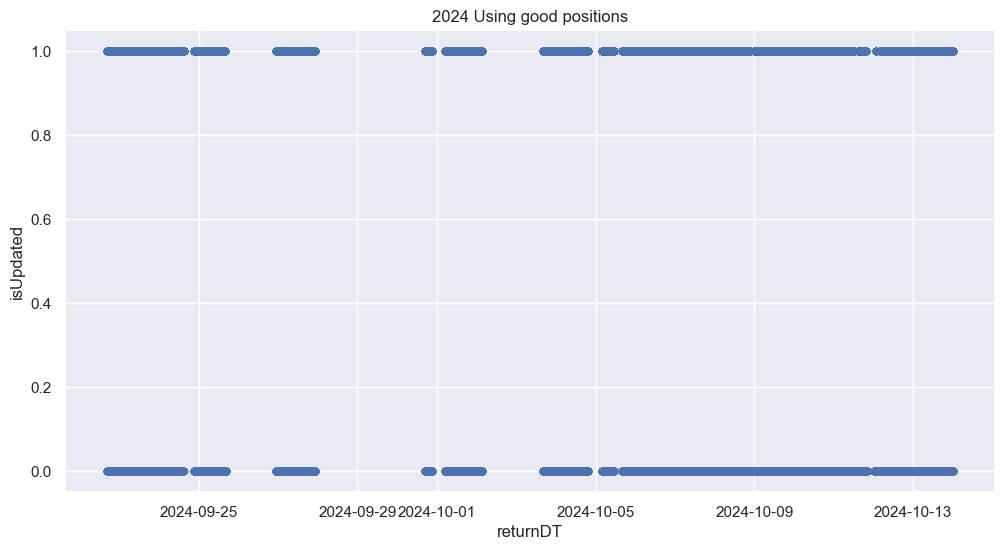

In [ ]:
shotdata_df.plot(x="returnDT", y="isUpdated", kind="scatter", s, figsize=(12, 6), title=f"{year} Using good positions")